In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
df_regression = pd.read_csv('Student_Performance.csv')
df_binomial = pd.read_csv('data.csv')
df_ordinal = pd.read_csv('Student_performance_data _.csv')
df_multinomial = pd.read_csv('Iris.csv')

#Regression

In [ ]:
df_regression.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
df_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
df_regression.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
df_regression.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [ ]:
df_regression['Extracurricular Activities'] = df_regression['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [ ]:
df_regression.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


#Simple Linear Regression

In [ ]:
# a. Simple Linear Regression
X_simple = df_regression[['Hours Studied']]
y_simple = df_regression['Performance Index']
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

In [ ]:
simple_lr = LinearRegression()

In [ ]:
simple_lr.fit(X_train_simple, y_train_simple)
y_pred_simple = simple_lr.predict(X_test_simple)

In [ ]:
print(y_pred_simple)

[55.35813703 47.00523571 60.92673791 ... 47.00523571 49.78953615
 55.35813703]


In [ ]:
mse_lr = mean_squared_error(y_test_simple, y_pred_simple)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test_simple, y_pred_simple)

In [ ]:
print("Mean Squared Error (MSE):", mse_lr)
print("Root Mean Squared Error (RMSE):", rmse_lr)
print("R-squared (R2):", r2_lr)

Mean Squared Error (MSE): 321.8145383172104
Root Mean Squared Error (RMSE): 17.93919001285204
R-squared (R2): 0.13160425385996788


#Multiple Linear Regression

In [ ]:
#Multiple Linear Regression
X_multi = df_regression.drop('Performance Index', axis=1)
y_multi = df_regression['Performance Index']
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)


In [ ]:
multi_lr = LinearRegression()
multi_lr.fit(X_train_multi, y_train_multi)
y_pred_multi = multi_lr.predict(X_test_multi)

In [ ]:
print(y_pred_multi)

[54.71185392 22.61551294 47.90314471 ... 16.79341955 63.34327368
 45.94262301]


In [ ]:
mse_multiple_lr = mean_squared_error(y_test_multi, y_pred_multi)
rmse_multiple_lr = np.sqrt(mse_multiple_lr)
r2_multiple_lr = r2_score(y_test_multi, y_pred_multi)

In [ ]:
print("Mean Squared Error (MSE):", mse_multiple_lr)
print("Root Mean Squared Error (RMSE):", rmse_multiple_lr)
print("R-squared (R2):", r2_multiple_lr)

Mean Squared Error (MSE): 4.082628398521853
Root Mean Squared Error (RMSE): 2.0205515085050054
R-squared (R2): 0.9889832909573145


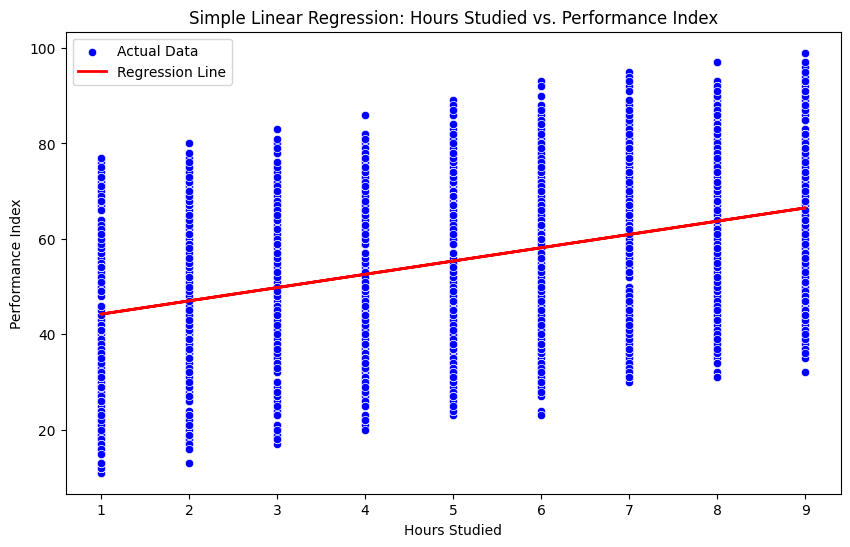

In [ ]:
# d. Visualizations (Regression)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_simple['Hours Studied'], y=y_test_simple, color='blue', label='Actual Data')
plt.plot(X_test_simple['Hours Studied'], y_pred_simple, color='red', linewidth=2, label='Regression Line')
plt.title('Simple Linear Regression: Hours Studied vs. Performance Index')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.legend()


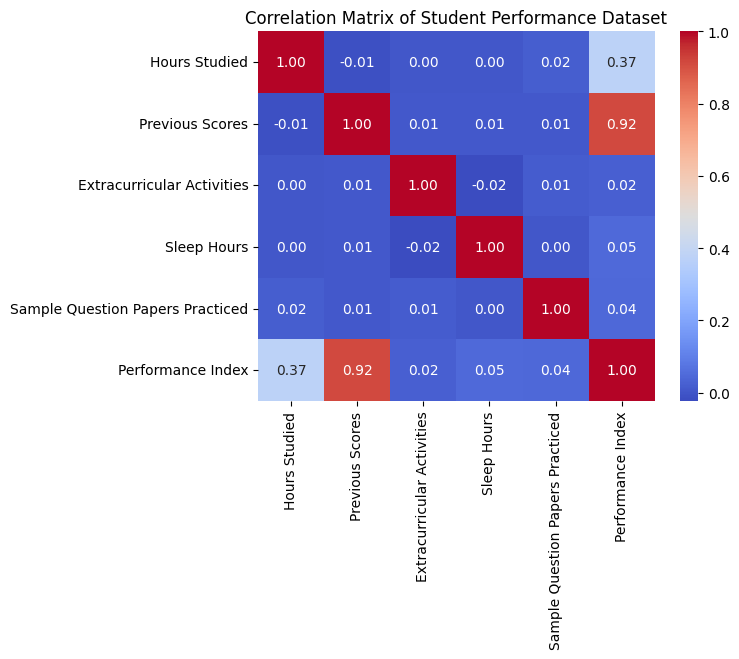

In [ ]:
sns.heatmap(df_regression.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Student Performance Dataset')
plt.show()

#LOGISTIC REGRESSION -> CLASSIFICATION

#Binomial Logistic Regression

In [ ]:
#Binomial Logistic Regression (Breast Cancer Dataset)
df_binomial.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df_binomial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df_binomial.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
df_binomial.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
df_binomial.nunique()

,0
id,569
diagnosis,2
radius_mean,456
texture_mean,479
perimeter_mean,522
area_mean,539
smoothness_mean,474
compactness_mean,537
concavity_mean,537
concave points_mean,542


In [ ]:
df_binomial = df_binomial.drop(['id', 'Unnamed: 32'], axis=1, errors='ignore')
df_binomial['diagnosis'] = df_binomial['diagnosis'].map({'M': 1, 'B': 0})



In [ ]:
df_binomial.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X_binom = df_binomial.drop('diagnosis', axis=1)
y_binom = df_binomial['diagnosis']
X_train_binom, X_test_binom, y_train_binom, y_test_binom = train_test_split(X_binom, y_binom, test_size=0.2, random_state=42, stratify=y_binom)


In [ ]:
binom_log_reg = LogisticRegression(max_iter=10000)
binom_log_reg.fit(X_train_binom, y_train_binom)
y_pred_binom = binom_log_reg.predict(X_test_binom)
y_pred_proba_binom = binom_log_reg.predict_proba(X_test_binom)[:, 1]


In [ ]:
print(f"\nBinomial Logistic Regression Accuracy: {accuracy_score(y_test_binom, y_pred_binom):.2f}")
print("Classification Report:\n", classification_report(y_test_binom, y_pred_binom))


Binomial Logistic Regression Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95        72
           1       0.97      0.86      0.91        42

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



Text(50.722222222222214, 0.5, 'Actual')

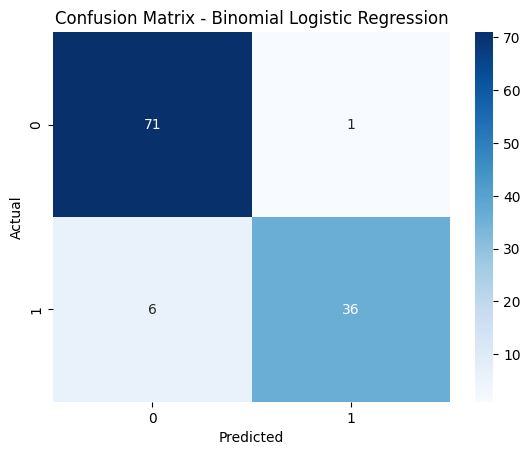

In [ ]:
# Binomial Visualizations
sns.heatmap(confusion_matrix(y_test_binom, y_pred_binom), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Binomial Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')


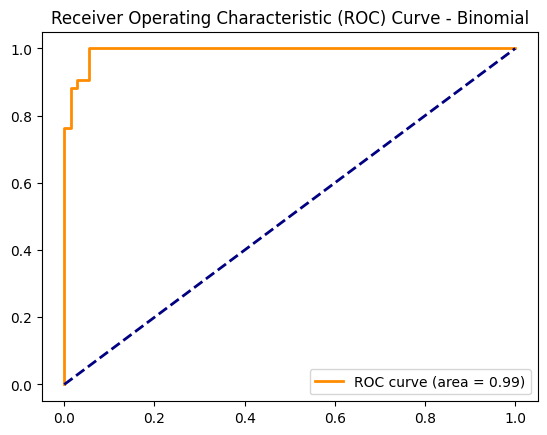

In [ ]:
fpr, tpr, _ = roc_curve(y_test_binom, y_pred_proba_binom)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve - Binomial')
plt.legend(loc="lower right")


In [ ]:
# b. Multinomial Logistic Regression (Iris Dataset)
df_multinomial.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df_multinomial.nunique()

,0
Id,150
SepalLengthCm,35
SepalWidthCm,23
PetalLengthCm,43
PetalWidthCm,22
Species,3


In [ ]:
df_multinomial.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df_multinomial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df_multinomial.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
le = LabelEncoder()
df_multinomial['Species'] = le.fit_transform(df_multinomial['Species'])


In [ ]:
df_multinomial = df_multinomial.drop(['Id'],axis = 1)

In [ ]:
df_multinomial

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
X_multi_class = df_multinomial.drop(['Species'], axis=1)
y_multi_class = df_multinomial['Species']
X_train_multi_class, X_test_multi_class, y_train_multi_class, y_test_multi_class = train_test_split(X_multi_class, y_multi_class, test_size=0.2, random_state=42, stratify=y_multi_class)


In [ ]:
multi_log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
multi_log_reg.fit(X_train_multi_class, y_train_multi_class)
y_pred_multi_class = multi_log_reg.predict(X_test_multi_class)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
print(f"\nMultinomial Logistic Regression Accuracy: {accuracy_score(y_test_multi_class, y_pred_multi_class):.2f}")
print("Classification Report:\n", classification_report(y_test_multi_class, y_pred_multi_class))



Multinomial Logistic Regression Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Text(50.722222222222214, 0.5, 'Actual')

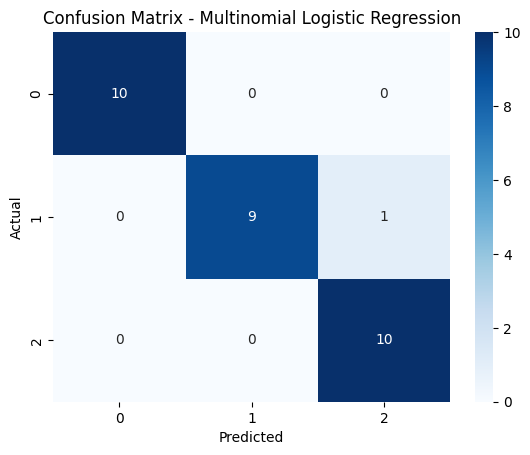

In [ ]:
# Multinomial Visualization
sns.heatmap(confusion_matrix(y_test_multi_class, y_pred_multi_class), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Multinomial Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
# Ordinal Logistic Regression (Student Grades Dataset)
df_ordinal.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [ ]:
df_ordinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [ ]:
df_ordinal.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [ ]:
df_ordinal.isnull().sum()

,0
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0


In [ ]:
X_ord = df_ordinal.drop(['StudentID', 'GradeClass'], axis=1)
y_ord = df_ordinal['GradeClass']
X_train_ord, X_test_ord, y_train_ord, y_test_ord = train_test_split(X_ord, y_ord, test_size=0.2, random_state=42, stratify=y_ord)



In [ ]:
ord_log_reg = LogisticRegression(max_iter=10000)
ord_log_reg.fit(X_train_ord, y_train_ord)
y_pred_ord = ord_log_reg.predict(X_test_ord)


In [ ]:
print(f"\nOrdinal Logistic Regression Accuracy: {accuracy_score(y_test_ord, y_pred_ord):.2f}")
print("Classification Report:\n", classification_report(y_test_ord, y_pred_ord, zero_division=0))



Ordinal Logistic Regression Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

         0.0       0.40      0.19      0.26        21
         1.0       0.63      0.54      0.58        54
         2.0       0.63      0.78      0.70        78
         3.0       0.79      0.64      0.71        83
         4.0       0.91      0.97      0.94       243

    accuracy                           0.80       479
   macro avg       0.67      0.62      0.64       479
weighted avg       0.79      0.80      0.79       479



Text(50.722222222222214, 0.5, 'Actual')

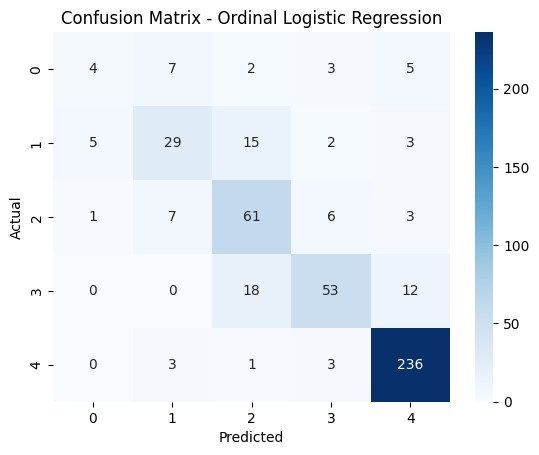

In [ ]:
# Ordinal Visualization
sns.heatmap(confusion_matrix(y_test_ord, y_pred_ord), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Ordinal Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
X_train_multi, X_test_multi, y_train_multi, y_test_multi

(      Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
 9254              5               49                           0            7   
 1561              2               48                           1            7   
 1670              2               81                           0            7   
 6087              2               46                           0            6   
 6669              8               47                           0            9   
 ...             ...              ...                         ...          ...   
 5734              8               50                           1            6   
 5191              4               68                           0            9   
 5390              9               48                           0            7   
 860               1               47                           0            9   
 7270              2               46                           0            6   
 
       Sample 

In [ ]:
#SCALING FEATURES FOR SGDRegressor
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_multi)
X_test_reg_scaled = scaler_reg.transform(X_test_multi)

In [ ]:
# i. Changing only the learning rate
print("\ni. Changing Learning Rate")
learning_rates_reg = [0.0001, 0.001, 0.01, 0.1]
for lr in learning_rates_reg:
    sgd_reg = SGDRegressor(eta0=lr, learning_rate='constant', random_state=42, max_iter=1000)
    sgd_reg.fit(X_train_reg_scaled, y_train_multi)
    y_pred_reg = sgd_reg.predict(X_test_reg_scaled)
    rmse = np.sqrt(mean_squared_error(y_test_multi, y_pred_reg))
    r2 = r2_score(y_test_multi, y_pred_reg)
    print(f"Learning Rate: {lr} -> RMSE: {rmse:.2f}, R2 Score: {r2:.2f}")


i. Changing Learning Rate
Learning Rate: 0.0001 -> RMSE: 2.02, R2 Score: 0.99
Learning Rate: 0.001 -> RMSE: 2.03, R2 Score: 0.99
Learning Rate: 0.01 -> RMSE: 2.06, R2 Score: 0.99
Learning Rate: 0.1 -> RMSE: 2.19, R2 Score: 0.99


In [ ]:
# ii. Changing only the number of iterations
print("\nii. Changing Number of Iterations")
iterations_reg = [100, 500, 1000, 2000]
best_lr_reg = 0.01 # Using a good learning rate from the step above
for iters in iterations_reg:
    sgd_reg = SGDRegressor(eta0=best_lr_reg, learning_rate='constant', random_state=42, max_iter=iters)
    sgd_reg.fit(X_train_reg_scaled, y_train_multi)
    y_pred_reg = sgd_reg.predict(X_test_reg_scaled)
    rmse = np.sqrt(mean_squared_error(y_test_multi, y_pred_reg))
    r2 = r2_score(y_test_multi, y_pred_reg)
    print(f"Iterations: {iters} -> RMSE: {rmse:.2f}, R2 Score: {r2:.2f}")


ii. Changing Number of Iterations
Iterations: 100 -> RMSE: 2.06, R2 Score: 0.99
Iterations: 500 -> RMSE: 2.06, R2 Score: 0.99
Iterations: 1000 -> RMSE: 2.06, R2 Score: 0.99
Iterations: 2000 -> RMSE: 2.06, R2 Score: 0.99


In [ ]:
# iii. Changing both learning rate and iterations
print("\niii. Changing Both")
sgd_reg_both = SGDRegressor(eta0=0.001, max_iter=2000, learning_rate='constant', random_state=42)
sgd_reg_both.fit(X_train_reg_scaled, y_train_multi)
y_pred_reg_both = sgd_reg_both.predict(X_test_reg_scaled)
rmse = np.sqrt(mean_squared_error(y_test_multi, y_pred_reg_both))
r2 = r2_score(y_test_multi, y_pred_reg_both)
print(f"Learning Rate: 0.001, Iterations: 2000 -> RMSE: {rmse:.2f}, R2 Score: {r2:.2f}")


iii. Changing Both
Learning Rate: 0.001, Iterations: 2000 -> RMSE: 2.03, R2 Score: 0.99


In [ ]:
#SCALING FEATURES FOR SGDClassifier
scaler_binom = StandardScaler()
X_train_binom_scaled = scaler_binom.fit_transform(X_train_binom)
X_test_binom_scaled = scaler_binom.transform(X_test_binom)

In [ ]:
# i. Changing only the learning rate
print("\ni. Changing Learning Rate")
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1]
for lr in learning_rates:
    sgd_clf = SGDClassifier(loss='log_loss', eta0=lr, learning_rate='constant', random_state=42)
    sgd_clf.fit(X_train_binom_scaled, y_train_binom)
    y_pred_sgd = sgd_clf.predict(X_test_binom_scaled)
    print(f"Accuracy with learning rate {lr}: {accuracy_score(y_test_binom, y_pred_sgd):.3f}")


i. Changing Learning Rate
Accuracy with learning rate 0.0001: 0.965
Accuracy with learning rate 0.001: 0.982
Accuracy with learning rate 0.01: 0.982
Accuracy with learning rate 0.1: 0.974
Accuracy with learning rate 1: 0.956


In [ ]:
# ii. Changing only the number of iterations
print("\nii. Changing Number of Iterations")
iterations = [10, 50, 100, 500, 1000, 5000, 10000]
for iters in iterations:
    log_reg_iter = LogisticRegression(max_iter=iters, random_state=42, solver='liblinear')
    log_reg_iter.fit(X_train_binom, y_train_binom)
    y_pred_iter = log_reg_iter.predict(X_test_binom)
    print(f"Accuracy with {iters} iterations: {accuracy_score(y_test_binom, y_pred_iter):.3f}")


ii. Changing Number of Iterations
Accuracy with 10 iterations: 0.912
Accuracy with 50 iterations: 0.939
Accuracy with 100 iterations: 0.939
Accuracy with 500 iterations: 0.939
Accuracy with 1000 iterations: 0.939
Accuracy with 5000 iterations: 0.939
Accuracy with 10000 iterations: 0.939


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# iii. Changing both learning rate and iterations
print("\niii. Changing Both Learning Rate and Iterations")
sgd_clf_both = SGDClassifier(loss='log_loss', eta0=0.01, max_iter=1000, learning_rate='constant', random_state=42)
sgd_clf_both.fit(X_train_binom_scaled, y_train_binom)
y_pred_both = sgd_clf_both.predict(X_test_binom_scaled)
print(f"Accuracy with learning rate 0.01 and 1000 iterations: {accuracy_score(y_test_binom, y_pred_both):.3f}")


iii. Changing Both Learning Rate and Iterations
Accuracy with learning rate 0.01 and 1000 iterations: 0.982
